In [20]:
#Graphs to vizulise the accruacy of each dtw module in global comparison not window
#modules to make graphs
library("ggplot2")
library("gridExtra")
library("rgl")
library("dplyr")




,Var1,Var2,Freq
1,cdtw,Correct,0
2,dtw,Correct,0
3,ftw,Correct,0
4,mlpy,Correct,0
5,mlpy_sub,Correct,11
6,pydtw,Correct,0
7,ucr,Correct,11
8,cdtw,Incorrect,11
9,dtw,Incorrect,11
10,ftw,Incorrect,11


,Module,AvgTime,Test
1,cdtw,13010.7272727273,Global
2,dtw,607992.545454545,Global
3,ftw,448633.818181818,Global
4,mlpy,28241.4545454545,Global
5,mlpy_sub,24620.0909090909,Global
6,pydtw,34034.1818181818,Global
7,ucr,500713.363636364,Global


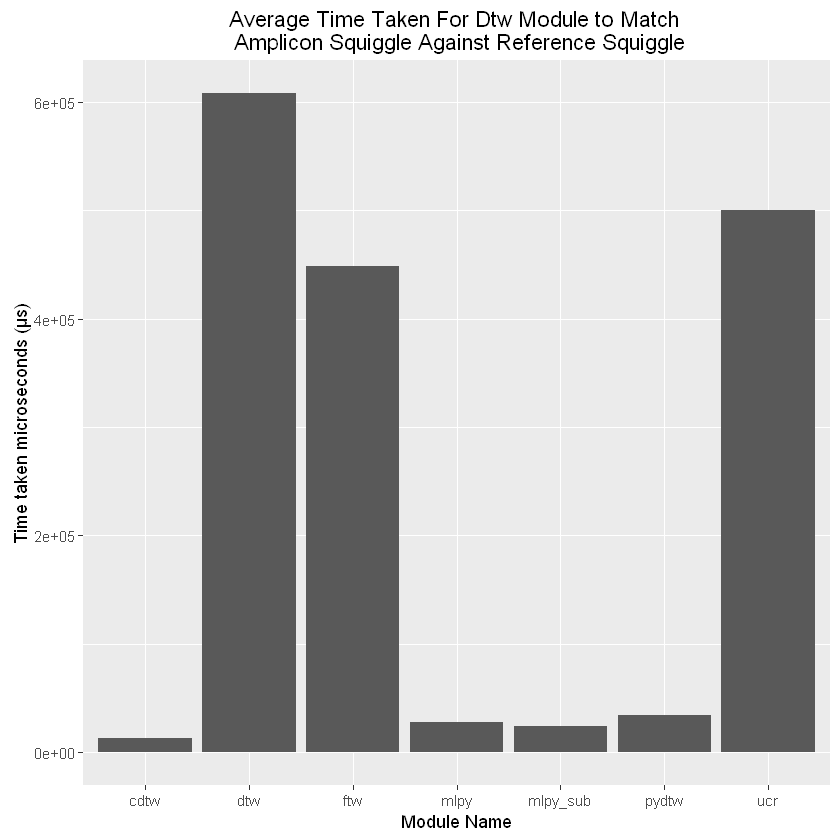

In [54]:
#load log file with time accuracy measuments of different dtw modules with global searching

all_time_accuracy= read.csv("./dtw_logs/bench_logallnew.txt", header = TRUE, sep=",",stringsAsFactors=FALSE)
#overall accuracy plot

#count how many were correct and not correct for each
accuracy = data.frame(table(all_time_accuracy$Module, all_time_accuracy$CorrectlyPredicted ))
accuracy

#avg time taken for each module to match amplicpns 1-11
avgtime_all = group_by(all_time_accuracy, Module) %>% summarize(AvgTime = sum(Time)/11)
#add label for later overall plot
avgtime_all["Test"] = "Global"
avgtime_all

#plot of times 
Fig1<-ggplot(data=avgtime_all,aes(x=Module, y=AvgTime)) + 
geom_bar(stat="identity") +
labs(y="Time taken microseconds (μs)",x="Module Name",title = "Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle") 

Fig1



,Algorithm,Amp1,Amp2,Amp3,Amp4,Amp5,Amp6,Amp7,Amp8,Amp9,Amp10,Amp11
1,ucr,1127592,1220139,1258212,1194161,1212422,1263434,1227065,1188152,1218884,1157148,1232769
2,ftw,6593342,6537843,6551381,6585604,6554072,6566075,6561331,6569977,6567905,6556787,6607582
3,cdtw,28406,28881,27674,28332,28314,28015,28200,27826,27995,27852,27936
4,mlpy,51054,51172,51260,50835,50981,51113,50962,50795,51054,50723,50894
5,dtw,37323275,37317578,37563289,37297409,37444877,37248683,37208524,37223651,37067983,37092011,37210092
6,mlpy_sub,44033,43686,44074,43852,43746,43892,44011,44265,43772,43772,43932


,Algorithm,AvgTime,Test
1,cdtw,28130.0909090909,window
2,dtw,37272488.3636364,window
3,ftw,6568354.45454545,window
4,mlpy,50985.7272727273,window
5,mlpy_sub,43912.2727272727,window
6,ucr,1209088.90909091,window


,Algorithm,AvgTime,Test
1,cdtw,28130.0909090909,window
2,dtw,37272488.3636364,window
3,ftw,6568354.45454545,window
4,mlpy,50985.7272727273,window
5,mlpy_sub,43912.2727272727,window
6,ucr,1209088.90909091,window


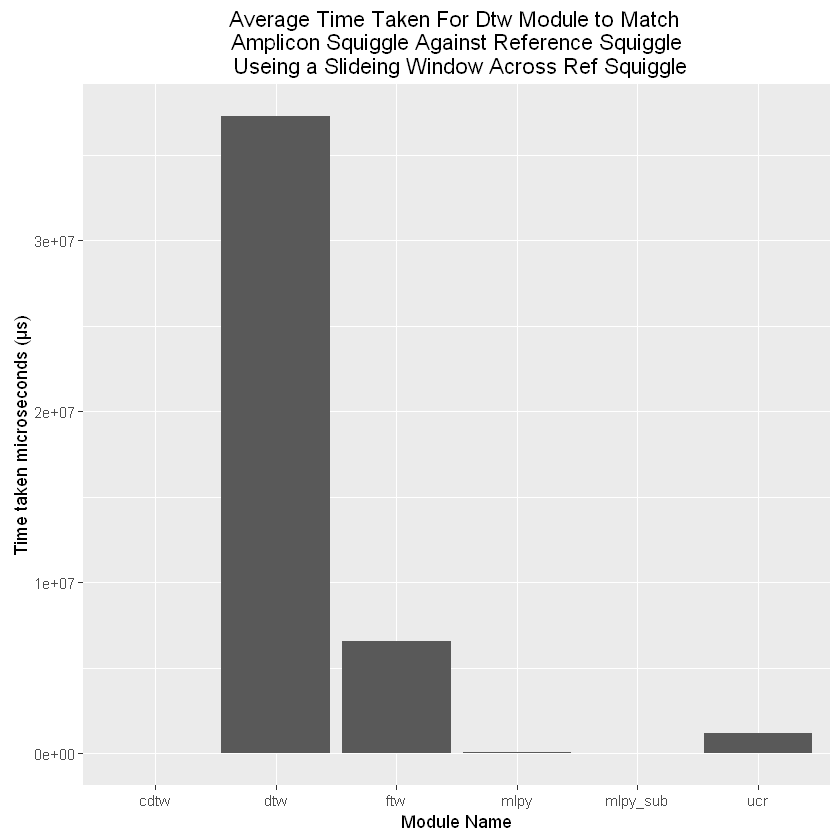

In [73]:
#load log with time measuments of different dtw modules with window searching
window_total_times = read.csv("./dtw_logs/Algorithm_Time.txt", header = TRUE, sep=",", stringsAsFactors=FALSE)
window_total_times
#avg time taken for each module to match amplicpns 1-11
avgtime_window = group_by(window_total_times, Algorithm) %>% summarize(
    "AvgTime" = (sum(Amp1)+sum(Amp2)+sum(Amp3)+sum(Amp4)+sum(Amp5)+
                 sum(Amp6)+sum(Amp7)+sum(Amp8)+sum(Amp9)+sum(Amp10)+
                 sum(Amp11))/11)

#add for later overview
avgtime_window["Test"] = "window"
avgtime_window

avgtime_window

colnames(avgtime_window) <- c("Module", "AvgTime", "Test")

#plot of times 
Fig2<-ggplot(data=avgtime_window,aes(x=Module, y=AvgTime)) + 
geom_bar(stat="identity") +
labs(y="Time taken microseconds (μs)",x="Module Name",title = "Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle \n Useing a Slideing Window Across Ref Squiggle") 

Fig2



,module,correct
1,ucr,11
2,ftw,3
3,cdtw,2
4,mlpy,5
5,dtw,7
6,mlpy_sub,11


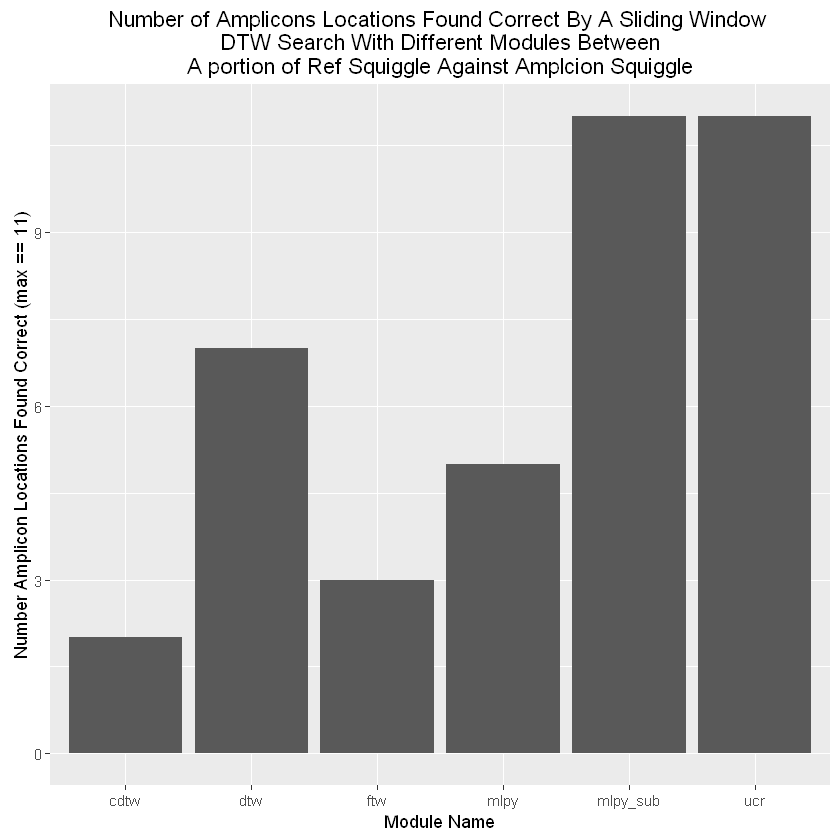

In [72]:
#count how many were correct and not correct for each

accuracy = read.csv("./dtw_logs/Algorithm_Accuracy.txt", header = TRUE, sep=",", stringsAsFactors=FALSE)

module = c("ucr", "ftw", "cdtw","mlpy","dtw","mlpy_sub")
correct = c(11,3,2,5,7,11)
accuracy_manual = data.frame(module, correct,stringsAsFactors=FALSE)
accuracy_manual

Fig3<-ggplot(data=accuracy_manual,aes(x=module, y=correct)) + 
geom_bar(stat="identity") +
labs(y="Number Amplicon Locations Found Correct (max == 11)",x="Module Name",title = "Number of Amplicons Locations Found Correct By A Sliding Window \n DTW Search With Different Modules Between \n A portion of Ref Squiggle Against Amplcion Squiggle ") 

Fig3

,Module,AvgTime,Test
1,cdtw,28130.0909090909,window
2,dtw,37272488.3636364,window
3,ftw,6568354.45454545,window
4,mlpy,50985.7272727273,window
5,mlpy_sub,43912.2727272727,window
6,ucr,1209088.90909091,window
7,cdtw,13010.7272727273,Global
8,dtw,607992.545454545,Global
9,ftw,448633.818181818,Global
10,mlpy,28241.4545454545,Global


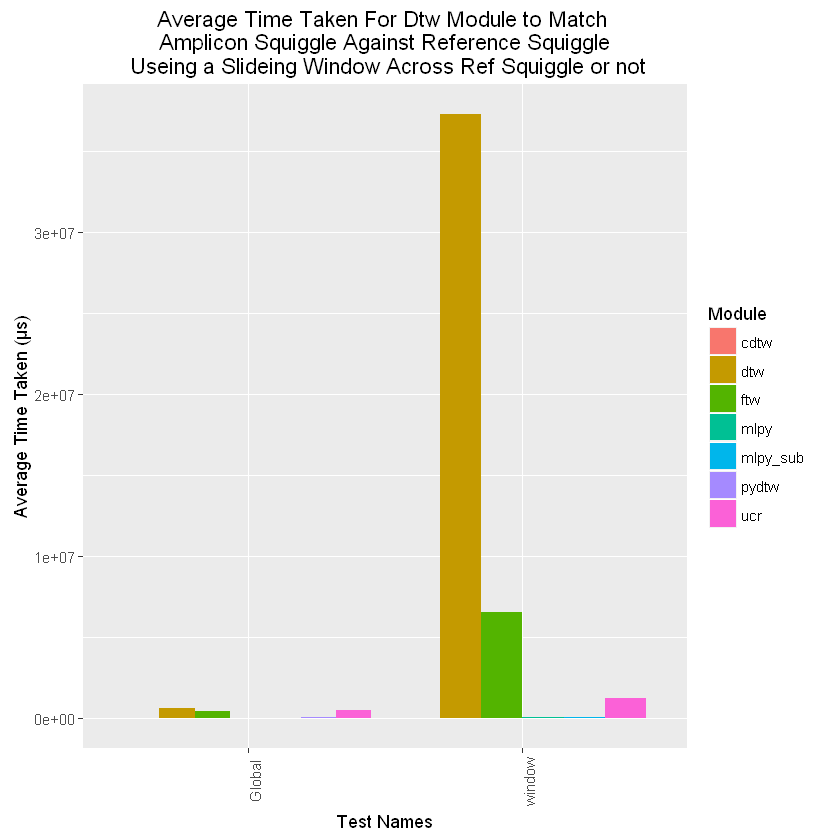

In [69]:
#overall grouped bare plots to compare the two tests
#combind data frames
newtime = rbind(avgtime_window,avgtime_all)
newtime

ggplot(newtime,aes(Test,AvgTime, fill=Module)) + 
geom_bar(stat= "identity", position= "dodge") +   
theme(axis.text.x=element_text(angle=90))+
ylab("Average Time Taken (μs)") + xlab("Test Names") + ggtitle("Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle \n Useing a Slideing Window Across Ref Squiggle or not")

